# _Tested Working on Linux, need to test for Windows and Mac_
# _plots need to be resized_

## University of Pennsylvania, Masters in Applied Geosciences

### Groundwater Flow and Transport Modeling, Prepared by Carl Mastropaolo

### Class Problem 2

#### Notebook by Spencer Harris

In [1]:
import sys
print(sys.executable)

/home/zonas/miniconda3/bin/python


In [2]:
%matplotlib inline 
# '%' is a notebook specific command, remove if running outside of notebook
import os 
import flopy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mfexe = os.path.join("..", "..", "bin", "mf2005.nix") # adds path to mf2005.nix, which will be our executeable, to mfexe
abspath = os.path.abspath(mfexe) # assigns absolute path of mfexe to abspath, double checking
print(mfexe) #printing the variables
print(abspath)
print('if this =>  \"', os.path.isfile(mfexe),'\"  prints true, that means executable is in the correct spot')

../../bin/mf2005.nix
/home/zonas/Documents/Projects/newF_T/bin/mf2005.nix
if this =>  " True "  prints true, that means executable is in the correct spot


### Model starts below:

In [4]:
# creating an empty modflow container in FloPy, m is being defined as a python object
# Modflow model is stored in flopy -> modflow -> 
# shift + tab here to see how to input necessary files

m = flopy.modflow.Modflow(modelname = 'Prob2a', exe_name = mfexe) 

--------------------
#### Dis package

In [5]:
nlay = 2
nrow = 1
ncol = 21
nper = 1
itmuni = 4
lenuni = 1
laycbd = 0
delr = 50.
delc = 10.
top = 20.
botm = np.linspace(10,0,2)
perlen = 10.0 
nstp = 5
tsmult = 1
steady = False

dis = flopy.modflow.ModflowDis(m, nlay=nlay, nrow=nrow, ncol=ncol, nper=nper, delr=delr, delc=delc, 
                               laycbd=laycbd, top=top, botm=botm, perlen=perlen, nstp=nstp, tsmult=tsmult, 
                               steady=steady, itmuni=itmuni, lenuni=lenuni)



--------------------
#### Bcf package

In [6]:
laycon = np.linspace(0,0,2)
hdry = 777.77
laycon = np.linspace(0,0,2)
trpy = np.linspace(1,1,2)
tran = np.linspace(100,100,2)
sf1 = np.linspace(0.0005, 0.0005, 2)

bcf = flopy.modflow.ModflowBcf(m, laycon=laycon, trpy=trpy, hdry=hdry, tran=tran, sf1=sf1)
# help(flopy.modflow.ModflowBcf)

--------------------
#### Bas package

In [7]:
ibound = np.ones((nlay, nrow, ncol), dtype=np.int)
ibound[0,0,0] = -1
ibound[0,0,-1] = -1 
# or could be the following ?:
#ibound = [0,0,3] = -1

strt = np.ones((nlay, nrow, ncol), dtype=np.float)
strt[:,:,:] = 50.0 #assigns 50' head to the first 3 cells
strt[0,0,-1] = 47.0 #assigns 47' head to the fourth cell

bas = flopy.modflow.ModflowBas(m, ibound=ibound, strt=strt)

print(ibound)
print(strt)


[[[-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]]

 [[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]]]
[[[ 50.  50.  50.  50.  50.  50.  50.  50.  50.  50.  50.  50.  50.  50.
    50.  50.  50.  50.  50.  50.  47.]]

 [[ 50.  50.  50.  50.  50.  50.  50.  50.  50.  50.  50.  50.  50.  50.
    50.  50.  50.  50.  50.  50.  50.]]]


--------------------
#### Sip package & Oc package

In [8]:
sip = flopy.modflow.ModflowSip(m, mxiter=40, nparm=5, accl=1, hclose=1e-06, ipcalc=1, wseed=2e-12, iprsip=1)

#below is output control
stress_period_data = {(0,0):['save head','save budget']}
oc = flopy.modflow.ModflowOc(m, stress_period_data=stress_period_data)

#help(flopy.modflow.ModflowOc)

####  writing our MODFLOW-2005 input files!

In [9]:
m.write_input()

#### running the model

In [10]:
m.run_model()

FloPy is using the following executable to run the model: ../../bin/mf2005.nix

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: Prob2a.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/10/07 13:59:12

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2017/10/07 13:59:12
 Elapsed run time:  0.007 Seconds

  Normal termination of simulation


(True, [])

#### fetching the heads file from the MODFLOW output

In [11]:
subfolder = '.'
fname = os.path.join(subfolder, 'Prob2a.hds')
headobj = flopy.utils.HeadFile(fname)
headarray = headobj.get_data()
#help(flopy.utils.HeadFile)
print(headobj)

#### plotting the heads using modelmap 

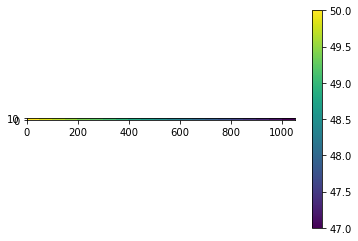

In [12]:
mm = flopy.plot.ModelMap(model=m)
#mm.plot_ibound()
#mm.plot_grid()
mm.plot_array(headarray)
hplot = mm.plot_array(headarray)
plt.colorbar(hplot)
#help(mm.plot_array)

#### plotting in model grid (ncol, nlay)

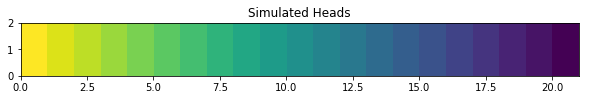

In [13]:
# Make a simple head plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
im = ax.imshow(headarray[:, 0, :], interpolation='nearest',
               extent=(0, ncol, 0, nlay))
ax.set_title('Simulated Heads')

#### The head levels from which we are creating the above plot

In [14]:
print(headarray)

[[[ 50.          49.84751892  49.6978569   49.54824448  49.39862823
    49.24900055  49.09936142  48.94970703  48.8000412   48.65036011
    48.50065994  48.35094452  48.20121384  48.05147171  47.90171051
    47.75193787  47.60214996  47.45235825  47.30255508  47.15269089  47.        ]]

 [[ 49.99412918  49.84740448  49.6978569   49.54824448  49.39862823
    49.24900055  49.09936142  48.94970703  48.8000412   48.65036011
    48.50065994  48.35094452  48.20121384  48.05147171  47.90171051
    47.75193787  47.60214996  47.45235825  47.30255508  47.15280533
    47.00587845]]]
